In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
from utilities import LitNeuralNet, ScaledData, get_model, see_results

data_loc = os.path.join(root, "dos-prediction-full/data")
model_loc = os.path.join(root, "dos-prediction-full/neural-nets/hyperparameter-search/logs/linear-search-30-min")

for model in os.listdir(model_loc):
    print(model)

Linear 1
Linear 15
Linear 12
Linear 18
Linear 20
Linear 6
Linear 8
Linear 2
Linear 16
Linear 11
Linear 5
Linear 19
Linear 13
Linear 7
Linear 0
Linear 14
[3, 87, 171, 255, 339, 423, 507, 301]
[3, 173, 343, 513, 683, 853, 1023, 301]
Linear 10
Linear 4
Linear 3
Linear 9
Linear 17


In [10]:
def model_results(architecture):
    model = get_model(os.path.join(model_loc, architecture))
    
    data = ScaledData(data_loc, X_name = "params", y_name = "dos")
    test_X_tensor = torch.from_numpy(data.test_X).float()
    predicted = model.forward_prop(test_X_tensor).detach().numpy()
    
    see_results(predicted, data.test_y, (2, 2), np.arange(0, 8, 2), np.linspace(-6, 6, 301))

model mse: 9.218901302438225e-05


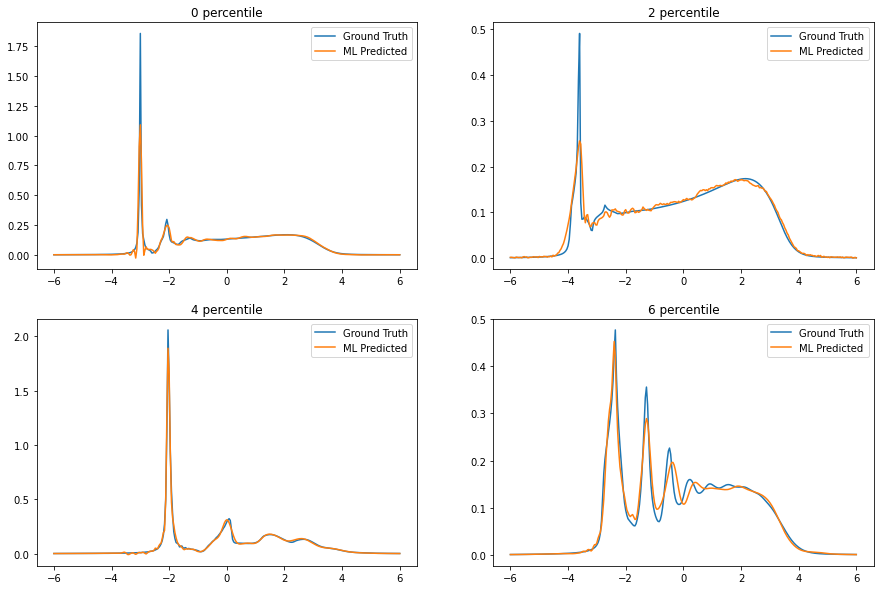

In [11]:
model_results("Linear 18")